# Classification on the CIFAR-10 using CNNS:
https://keras.io/api/layers/convolution_layers/convolution2d/

In [1]:
%matplotlib inline
import tensorflow as tf
from keras.models import Model
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import cifar10
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Let's see how our architecture works with only one cov2D and maxPooling:

# Define the input layer
input = Input(shape=(32, 32, 3))

# Define the layers
x = Conv2D(32, (3, 3), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
# outputs for 10 classes
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input, outputs=outputs)

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                             

#### other params remains the same:

In [4]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.5496 - accuracy: 0.4448
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2469 - accuracy: 0.5592
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1424 - accuracy: 0.5997
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0636 - accuracy: 0.6299
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9998 - accuracy: 0.6538
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9397 - accuracy: 0.6740
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8917 - accuracy: 0.6932
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8473 - accuracy: 0.7073
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8016 - accuracy: 0.7228
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.763

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0084 - accuracy: 0.6584


[1.0083502531051636, 0.6583999991416931]

In [7]:
import numpy as np
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 1ms/step


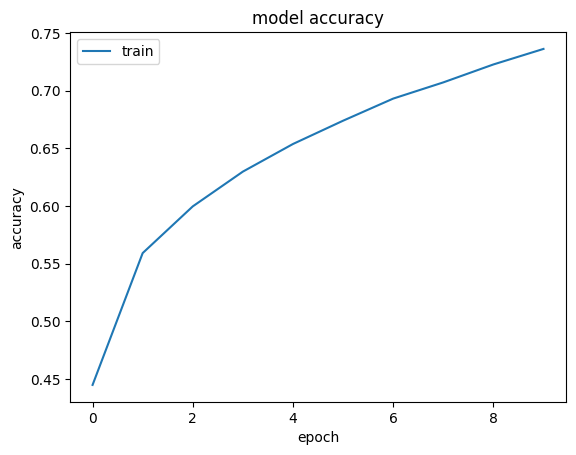

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

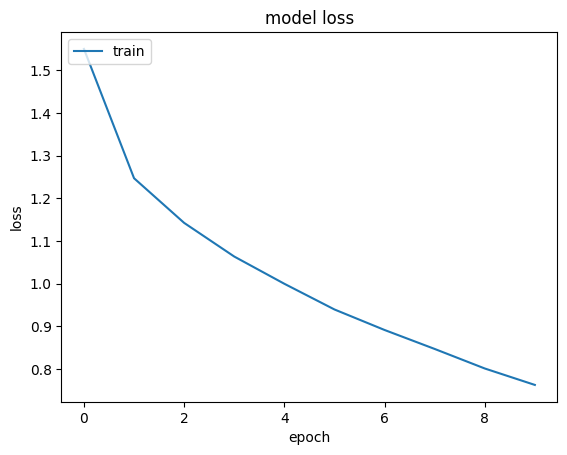

In [9]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

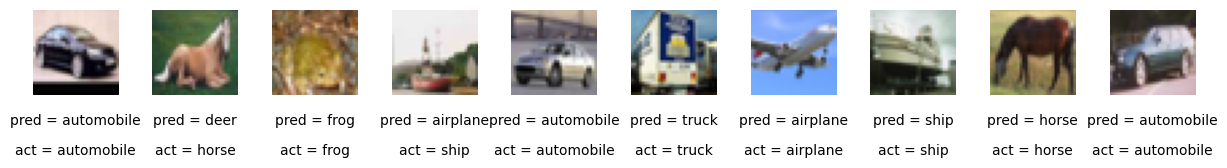

In [10]:
# Visualize predictions
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

## Using less layers we managed to get better score than DNN. Let's build bigger one

In [11]:
# Define the input layer
input = Input(shape=(32, 32, 3))

# Define the layers
x = Conv2D(32, (3, 3), activation='relu')(input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
#The output of a Conv2D layer is another four-dimensional tensor of shape (batch_size, height, width, filters)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
# outputs for 10 classes
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input, outputs=outputs)

# Display the model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                           

In [12]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.4289 - accuracy: 0.4906
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0783 - accuracy: 0.6207
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9333 - accuracy: 0.6734
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8347 - accuracy: 0.7088
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7531 - accuracy: 0.7375
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6761 - accuracy: 0.7646
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5993 - accuracy: 0.7916
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5242 - accuracy: 0.8180
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4510 - accuracy: 0.8444
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.381

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0908 - accuracy: 0.6838


[1.090827465057373, 0.6837999820709229]

#### the train accuracy increased, but the test accuracy did not. Let's change parameters like output size, filter size.

In [15]:
# Define the input layer
input = Input(shape=(32, 32, 3))

# Define the layers
x = Conv2D(filters=32, kernel_size=(3, 3), strides = (2,2), padding="valid", activation='relu')(input)
x = Conv2D(filters=16, kernel_size=(5, 5), strides = (1,1), padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
#The output of a Conv2D layer is another four-dimensional tensor of shape (batch_size, height, width, filters)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
# outputs for 10 classes
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input, outputs=outputs)

# Display the model summary
model.summary()
# see how fiters size affect output shape

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 16)        12816     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                           

In [16]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
# add validation split
history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6031 - accuracy: 0.4241 - val_loss: 1.3875 - val_accuracy: 0.5061
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2729 - accuracy: 0.5519 - val_loss: 1.2148 - val_accuracy: 0.5763
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1341 - accuracy: 0.5999 - val_loss: 1.1244 - val_accuracy: 0.6125
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0495 - accuracy: 0.6321 - val_loss: 1.0838 - val_accuracy: 0.6253
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9878 - accuracy: 0.6562 - val_loss: 1.0632 - val_accuracy: 0.6309
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9266 - accuracy: 0.6755 - val_loss: 1.0655 - val_accuracy: 0.6328
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8751 - accuracy: 0.6953 - val_loss: 1.0558 - val_accuracy:

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0287 - accuracy: 0.6558


[1.0286749601364136, 0.6557999849319458]

## lets modify and use some batch normalization and dropout
#### BAD - Batch normalization, Activation, Droput

In [19]:
from keras.layers import LeakyReLU, Activation

input = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
outputs = Activation('softmax')(x)

model = Model(input, outputs)

In [20]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [21]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 13s 6ms/step - loss: 1.6142 - accuracy: 0.4358 - val_loss: 1.2378 - val_accuracy: 0.5589
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2023 - accuracy: 0.5727 - val_loss: 1.2040 - val_accuracy: 0.5658
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0408 - accuracy: 0.6367 - val_loss: 0.9653 - val_accuracy: 0.6617
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9477 - accuracy: 0.6698 - val_loss: 1.0603 - val_accuracy: 0.6312
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8869 - accuracy: 0.6941 - val_loss: 0.9533 - val_accuracy: 0.6655
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8320 - accuracy: 0.7107 - val_loss: 1.1204 - val_accuracy: 0.6173
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7812 - accuracy: 0.7294 - val_loss: 0.9406 - val_accuracy

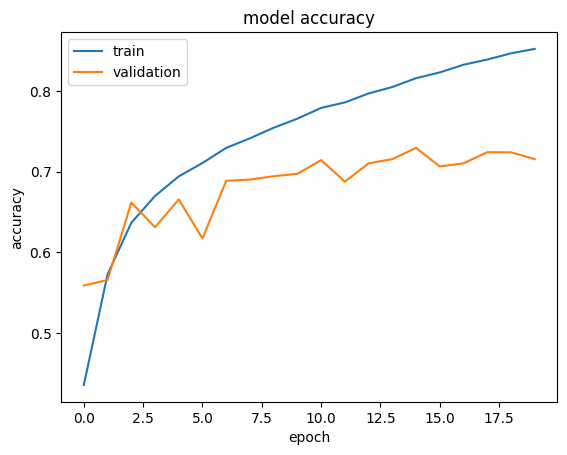

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

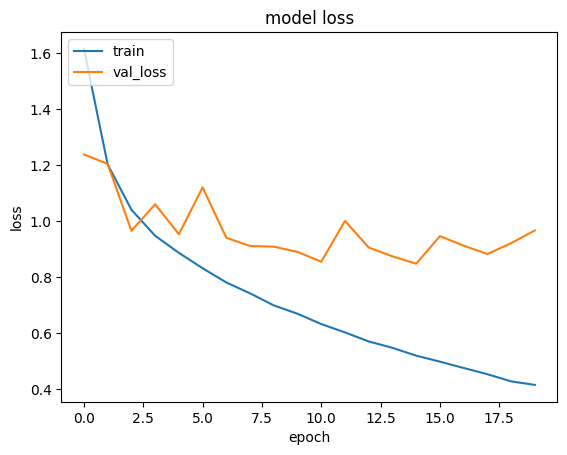

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0005 - accuracy: 0.7138


[1.0004570484161377, 0.7138000130653381]

In [26]:
# try to change some params in the network to improve accuracy.